<a href="https://colab.research.google.com/github/imamfaisal21/DataScientist/blob/main/B62_Mall_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/mall.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df, x = "Annual Income (k$)")

fig.show()

In [ ]:
fig = px.bar(df, x = "Genre", color = "Genre")

fig.show()

In [ ]:
df["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [ ]:
fig = px.scatter(df,
                 x = "Spending Score (1-100)",
                 y = "Annual Income (k$)",
                 color ="Genre")

fig.show()

In [ ]:
data = df[["Annual Income (k$)",
           "Spending Score (1-100)"]]

Elbow Method

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
distortions = []
inertias = []

for k in range(1, 10):
  kmeanmodel = KMeans(n_clusters = k).fit(data)
  nilai_distorsi = sum(np.min(cdist(data, kmeanmodel.cluster_centers_,
                                    "euclidean"), axis = 1)) / data.shape[0]
  nilai_inertia = kmeanmodel.inertia_
  distortions.append(nilai_distorsi)
  inertias.append(nilai_inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

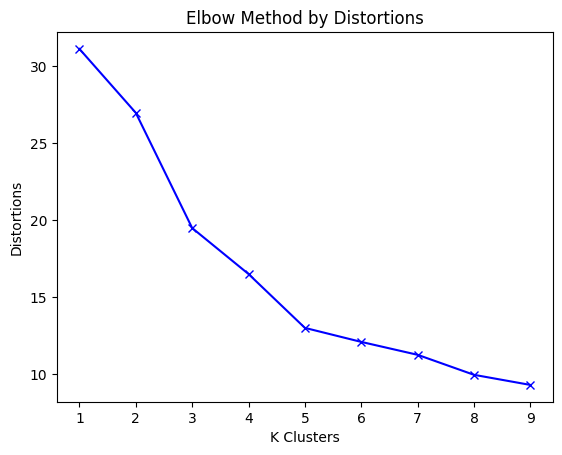

In [ ]:
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel("K Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method by Distortions")
plt.show()

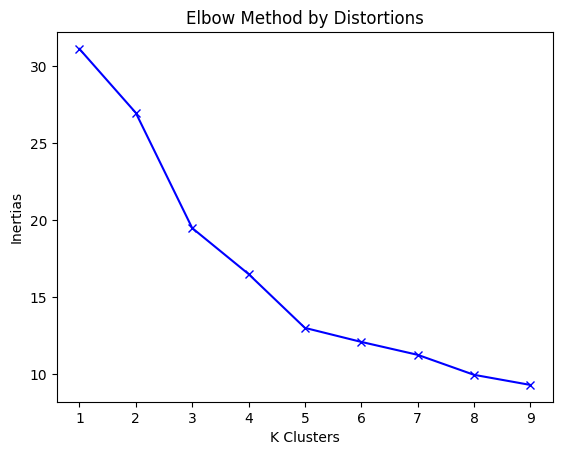

In [ ]:
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel("K Clusters")
plt.ylabel("Inertias")
plt.title("Elbow Method by Distortions")
plt.show()

In [ ]:
model = KMeans(n_clusters = 5, random_state = 2023)

model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=2023)

In [ ]:
pred = model.labels_
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
data["Cluster Customer"] = pred.astype(int)
data.head()

<ipython-input-15-9568833f3fc0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income (k$),Spending Score (1-100),Cluster Customer
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [ ]:
data.shape

(200, 3)

<ipython-input-17-dde128a9cb05>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



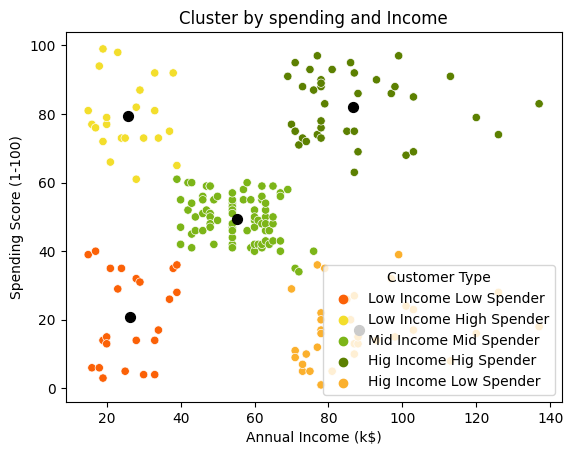

In [ ]:
def set_type(nomor):
  list_type = ["Mid Income Mid Spender",
               "Hig Income Low Spender",
               "Hig Income Hig Spender",
               "Low Income Low Spender",
               "Low Income High Spender"]

  return list_type[nomor]

data["Customer Type"] = data["Cluster Customer"].apply(lambda x : set_type(x))


color_palette = ["#FB6107", "#F3DE2C", "#7CB518", "#5C8001", "#FBB02D"]

sns.scatterplot(x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "Customer Type",
                data = data,
                palette = color_palette)

centroids = model.cluster_centers_

plt.scatter(centroids[:, 0],
            centroids[:, 1],
            c = "black",
            s = 50)

plt.title("Cluster by spending and Income")

plt.legend(loc = "lower right",
           title = "Customer Type")
plt.show()

In [ ]:
data["Customer Type"].value_counts() / data.shape[0] * 100

Mid Income Mid Spender     40.5
Hig Income Hig Spender     19.5
Hig Income Low Spender     17.5
Low Income Low Spender     11.5
Low Income High Spender    11.0
Name: Customer Type, dtype: float64